In [22]:
import pandas as pd 
import numpy as np
import string

#Stuff for ngrams and preprocessing
from nltk.util import pad_sequence
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten
from nltk import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords

#Stuff for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

#For results
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

#For a snazzier confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#Importing the dataset and having a look
df = pd.read_csv (r'/Users/williamfry/AmazonSentiment/preprocessed_kindle_review .csv')
df.head()

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [8]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [9]:
#Removing the parts of the dataset we don't actually need
df = df.drop(['summary', 'Unnamed: 0'], axis = 1)

#Removing puctuation from the text
df['cleanedText'] = df['reviewText'].apply(lambda x:remove_punctuation(x))


#Creating the X and y variables
y=df['rating'].values
X=df['cleanedText'].values

In [10]:
#Removing puctuation from the text
df['cleanedText'] = df['reviewText'].apply(lambda x:remove_punctuation(x))


#Creating the X and y variables
y=df['rating'].values
X=df['cleanedText'].values

In [11]:
#Text vectorisation
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,1))

X_tidf = vectorizer.fit_transform(X)
(X_train,X_test,y_train,y_test)=train_test_split(X_tidf,y, random_state=0)

In [12]:
#Function to train the neural network on the data returns the predicted and actual test y data
def neuralNetworkSimple(X, y, layers, solver):
    (X_train,X_test,y_train,y_test)=train_test_split(X,y, random_state=0)
    classifier = MLPClassifier(hidden_layer_sizes=layers, random_state=0,solver= solver)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    return y_test,y_pred, classifier

#Function to create a fancier confusion matrix using seaborn
def confusionMatrix(y_test,y_pred, lables):
    matrix =  confusion_matrix(y_test, y_pred)
    ax= plt.subplot()
    heat = sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap='Reds')
    ax.xaxis.set_ticklabels(lables)
    ax.yaxis.set_ticklabels(lables)
    return heat

/Users/williamfry/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<AxesSubplot:>

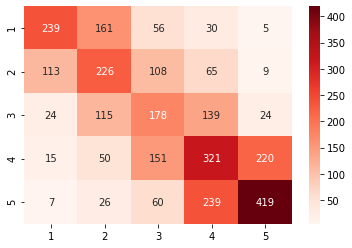

In [13]:
#Running the functions for the neural network
y_test,y_pred, classifier = neuralNetworkSimple(X_tidf, y, (32, 16, 8), 'lbfgs')
#Creating the axis lables for confusion matrix
lables = list(range(1,6))
#Making the confusion matrix
confusionMatrix(y_test, y_pred, lables) 


In [60]:
#Testing with 'home made reviews for a bit of fun
input = 'this product was really bad, i hated it so much, i would not buy again for the whole family'
input=[input]
vect = vectorizer.transform(input)
result = classifier.predict(vect)
result

array([2])